<a href="https://colab.research.google.com/github/uteThAn/BaitapAI/blob/main/robot_2bac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import math
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [40]:
def sind(x):
    return math.sin(math.radians(x))
 
def cosd(x):
    return math.cos(math.radians(x))

In [41]:
Px=[]
Py=[]
tt1=[] 
tt2=[]
for i in range(-120,120,1):
  for j in range(-45,45,1):
    Px.append(50*cosd(i) + 40*cosd(i+j))
    Py.append(50*sind(i) + 40*sind(i+j))
    tt1.append(math.radians(i))
    tt2.append(math.radians(j))


In [42]:
data = pd.DataFrame(np.c_[tt1,tt2,Px,Py],columns=['tt1','tt2','Px','Py'])

In [17]:
data

,tt1,tt2,Px,Py
0,-2.094395,-0.785398,-63.637033,-53.654032
1,-2.094395,-0.767945,-63.450468,-54.326764
2,-2.094395,-0.750492,-63.252190,-54.996138
3,-2.094395,-0.733038,-63.042261,-55.661950
4,-2.094395,-0.715585,-62.820743,-56.323996
...,...,...,...,...
21595,2.076942,0.698132,-61.583698,58.065703
21596,2.076942,0.715585,-61.828186,57.411791
21597,2.076942,0.733038,-62.061224,56.753712
21598,2.076942,0.750492,-62.282742,56.091665


In [43]:
x = data.drop(['Px','Py'],axis=1)
y = data.drop(['tt1','tt2'],axis=1)

In [44]:
print(x)
print(y)

            tt1       tt2
0     -2.094395 -0.785398
1     -2.094395 -0.767945
2     -2.094395 -0.750492
3     -2.094395 -0.733038
4     -2.094395 -0.715585
...         ...       ...
21595  2.076942  0.698132
21596  2.076942  0.715585
21597  2.076942  0.733038
21598  2.076942  0.750492
21599  2.076942  0.767945

[21600 rows x 2 columns]
              Px         Py
0     -63.637033 -53.654032
1     -63.450468 -54.326764
2     -63.252190 -54.996138
3     -63.042261 -55.661950
4     -62.820743 -56.323996
...          ...        ...
21595 -61.583698  58.065703
21596 -61.828186  57.411791
21597 -62.061224  56.753712
21598 -62.282742  56.091665
21599 -62.492671  55.425854

[21600 rows x 2 columns]


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17280, 2)
(17280, 2)
(4320, 2)
(4320, 2)


In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode="min",restore_best_weights=True)
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               1536      
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 2)                 258       
                                                                 
Total params: 330,114
Trainable params: 330,114
Non-trainable params: 0
_________________________________________________________________


In [53]:
#compile
opt = Adam(learning_rate=0.0001) #toi uu toc do hoc
model.compile(optimizer=opt,loss='mse',metrics=['accuracy']) #mse,mae : sai số bình phương trung bình

In [55]:
history = model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split=0.2,callbacks=[callback])

Epoch 1/100
108/108 [==============================] - 1s 11ms/step - loss: 3.0228 - accuracy: 0.9958 - val_loss: 2.9278 - val_accuracy: 0.9968
Epoch 2/100
108/108 [==============================] - 1s 11ms/step - loss: 2.6005 - accuracy: 0.9962 - val_loss: 2.5552 - val_accuracy: 0.9968
Epoch 3/100
108/108 [==============================] - 1s 11ms/step - loss: 2.2774 - accuracy: 0.9960 - val_loss: 2.2277 - val_accuracy: 0.9971
Epoch 4/100
108/108 [==============================] - 1s 10ms/step - loss: 1.9957 - accuracy: 0.9962 - val_loss: 1.9542 - val_accuracy: 0.9971
Epoch 5/100
108/108 [==============================] - 1s 11ms/step - loss: 1.7547 - accuracy: 0.9962 - val_loss: 1.7314 - val_accuracy: 0.9971
Epoch 6/100
108/108 [==============================] - 1s 11ms/step - loss: 1.5638 - accuracy: 0.9964 - val_loss: 1.5242 - val_accuracy: 0.9974
Epoch 7/100
108/108 [==============================] - 1s 11ms/step - loss: 1.3755 - accuracy: 0.9965 - val_loss: 1.3684 - val_accuracy:

In [56]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.010046429932117462
độ chính xác kiểm tra là:  0.9997684955596924


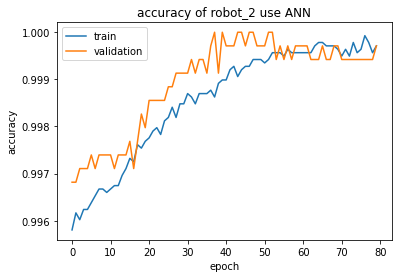

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of robot_2 use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [60]:
ypr=model.predict(x_test)
data = pd.DataFrame(np.c_[y_test,ypr,x_test],columns=['tt1','tt2','tt1_pre','tt2_pre','Px','Py'])
data

,tt1,tt2,tt1_pre,tt2_pre,Px,Py
0,-51.772691,-71.026894,-51.637047,-70.735458,-2.007129,-0.436332
1,-42.737873,-74.226291,-42.649529,-74.075363,-1.815142,-0.628319
2,-15.661179,84.447236,-15.750619,84.555840,2.024582,-0.610865
3,89.329154,10.968241,89.316261,10.832293,0.122173,0.000000
4,85.366356,23.386043,85.347092,23.428442,0.104720,0.366519
...,...,...,...,...,...,...
4315,-25.404787,-84.787490,-25.466082,-84.812553,-2.024582,0.366519
4316,-19.117069,86.698397,-19.107239,86.659592,1.640609,0.331613
4317,30.807789,84.127218,30.838560,84.099365,1.134464,0.191986
4318,27.641311,-85.635981,27.720407,-85.797592,-1.274090,0.034907
